In [3]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [4]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [5]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [6]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [7]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

print(len(autumn_wind), len(temp_reduced), len(winter_rain), len(summer_sun))

486752 486752 486752 486752


In [8]:
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)
print(years_expanded.shape)
data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

(486752,)


In [9]:
X = df[['Frost', 'Winter Rain', 'Spring Rain', 'Spring Sun', 'Spring Psl', 'Winter Sun', 'Autumn Rain', 'Rain', 'Spring Wind', 'Tmax']].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [27]:
import torch
import torch.nn as nn
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        # Placeholder list to store intermediate features from all batches
        self.FEATS = []

        # Placeholder dictionary to store intermediate features from each batch
        self.features = {}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

Final Training Accuracy: 0.8129
Final Validation Accuracy: 0.8129


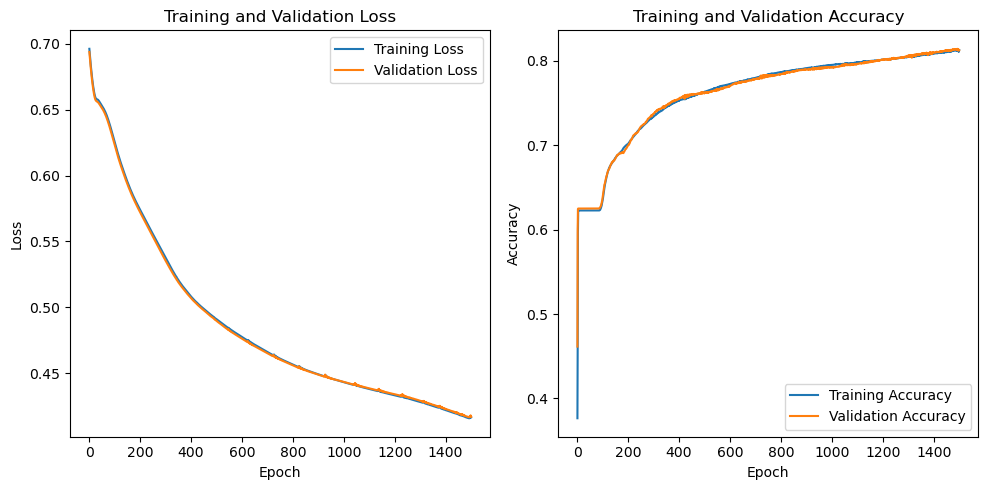

In [31]:
# Initialize the model
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
num_epochs = 1500

# Lists to store losses and accuracies
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = train_preds.eq(y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())
        val_losses.append(val_loss.item())  # Append validation loss for each epoch

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = val_preds.eq(y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)

    model.train()  # Set the model back to training mode
    
# Final training accuracy after all epochs
final_train_accuracy = train_accuracies[-1] 

# Print or use final_train_accuracy as needed
print(f'Final Training Accuracy: {final_train_accuracy:.4f}')

# Calculate final validation accuracy after all epochs
final_val_accuracy = val_accuracies[-1] 

# Print or use final_val_accuracy as needed
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_predictions = (model(X_test_tensor) >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor.view(-1, 1)).sum().item() / len(y_test_tensor)

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8141


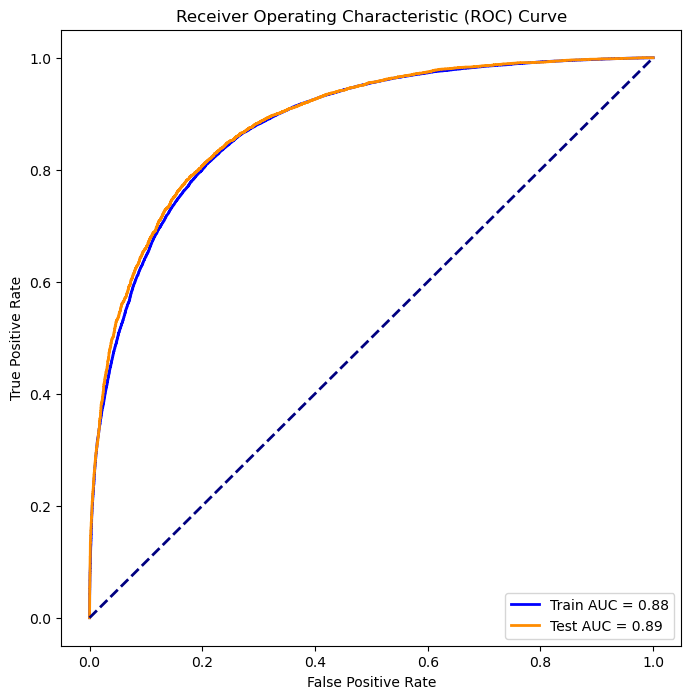

In [33]:
from sklearn.metrics import roc_curve, auc

# Set the model to evaluation mode
model.eval()

# Make predictions on the training set
with torch.no_grad():
    train_outputs = model(X_train_tensor).squeeze().numpy()

# Calculate the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_tensor.numpy(), train_outputs)
roc_auc_train = auc(fpr_train, tpr_train)

# Make predictions on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze().numpy()

# Calculate the ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor.numpy(), test_outputs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves for both training and test sets
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

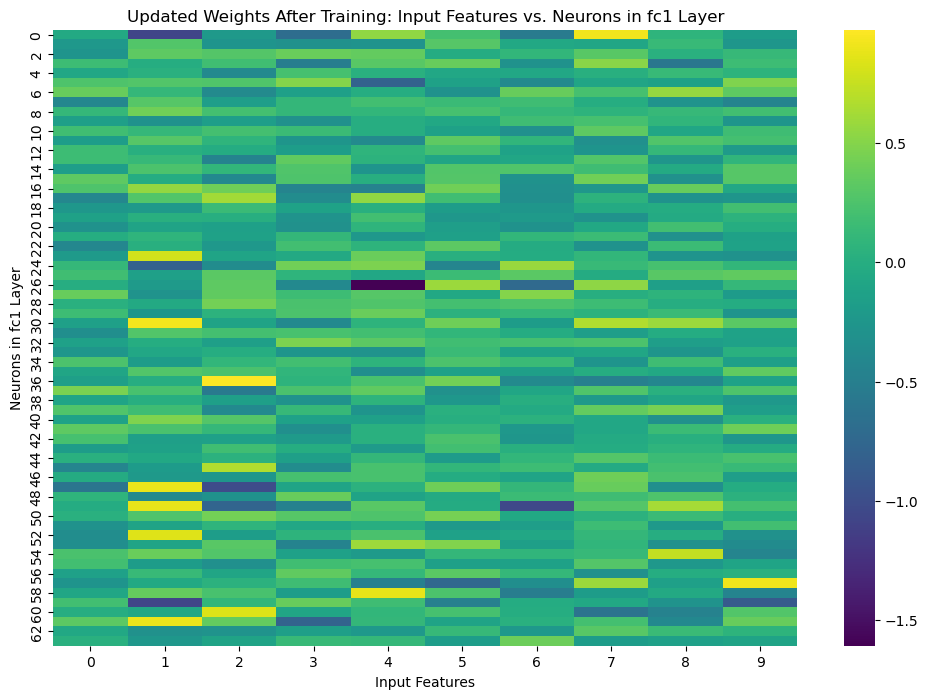

In [34]:
# Access the updated weights of the model after training
weights_after_training = model.fc1.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc1 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc1 Layer')
plt.show()

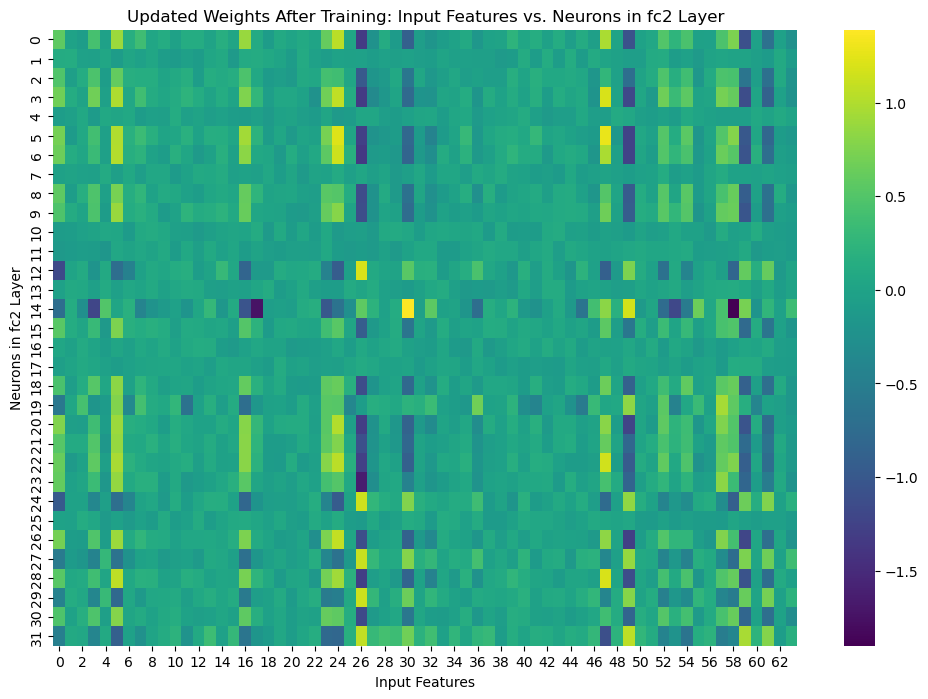

In [35]:
# Access the updated weights of the model after training
weights_after_training = model.fc2.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc2 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc2 Layer')
plt.show()

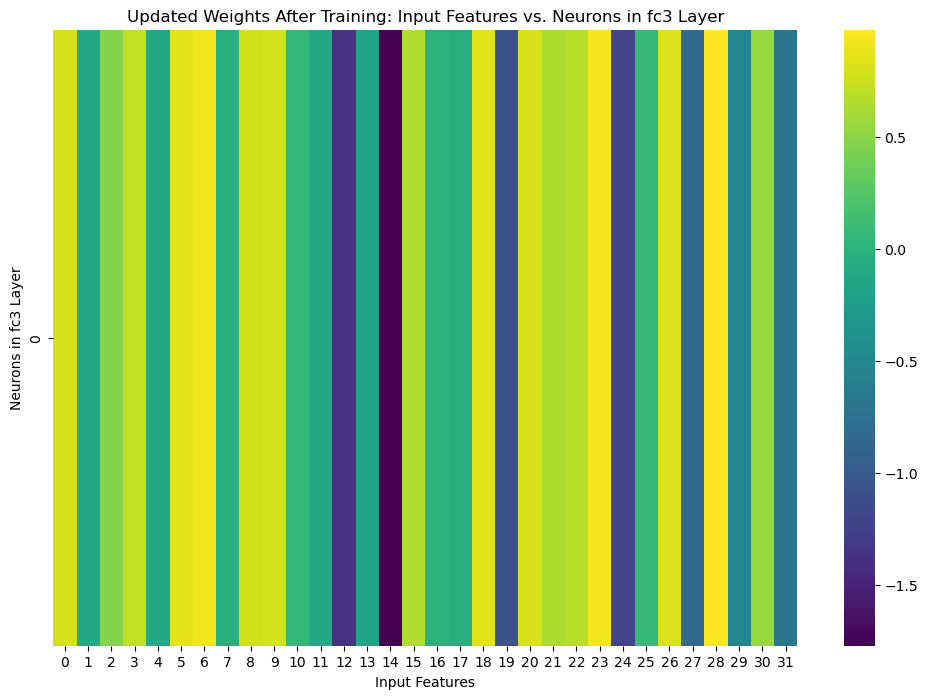

In [36]:
# Access the updated weights of the model after training
weights_after_training = model.fc3.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc3 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc3 Layer')
plt.show()

## Changing order

In [38]:
X = df[[ 'Rain', 'Tmax', 'Spring Rain', 'Winter Sun', 'Autumn Rain', 'Spring Wind', 'Winter Rain','Spring Psl', 'Spring Sun', 'Frost' ]].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [40]:
import torch
import torch.nn as nn
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        # Placeholder list to store intermediate features from all batches
        self.FEATS = []

        # Placeholder dictionary to store intermediate features from each batch
        self.features = {}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

Final Training Accuracy: 0.8173
Final Validation Accuracy: 0.8159


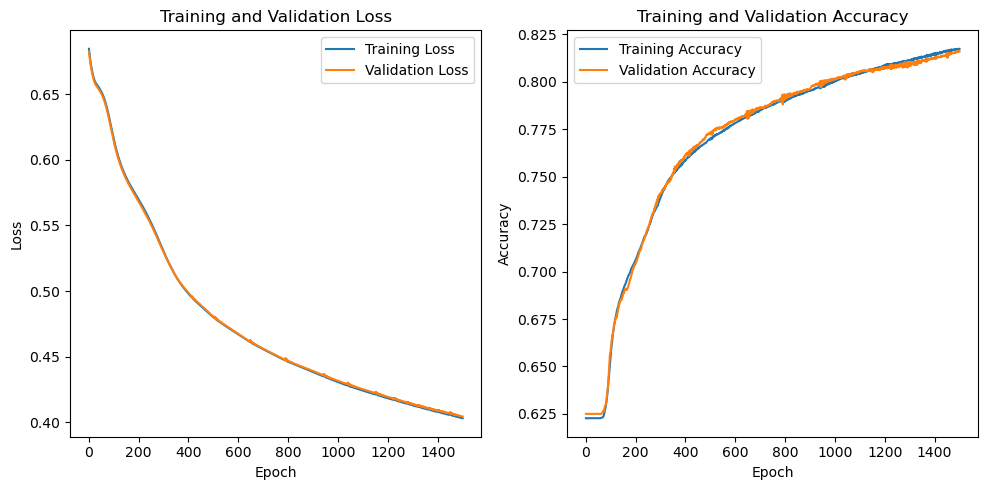

In [41]:
# Initialize the model
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
num_epochs = 1500

# Lists to store losses and accuracies
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = train_preds.eq(y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())
        val_losses.append(val_loss.item())  # Append validation loss for each epoch

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = val_preds.eq(y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)

    model.train()  # Set the model back to training mode
    
# Final training accuracy after all epochs
final_train_accuracy = train_accuracies[-1] 

# Print or use final_train_accuracy as needed
print(f'Final Training Accuracy: {final_train_accuracy:.4f}')

# Calculate final validation accuracy after all epochs
final_val_accuracy = val_accuracies[-1] 

# Print or use final_val_accuracy as needed
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_predictions = (model(X_test_tensor) >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor.view(-1, 1)).sum().item() / len(y_test_tensor)

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8197


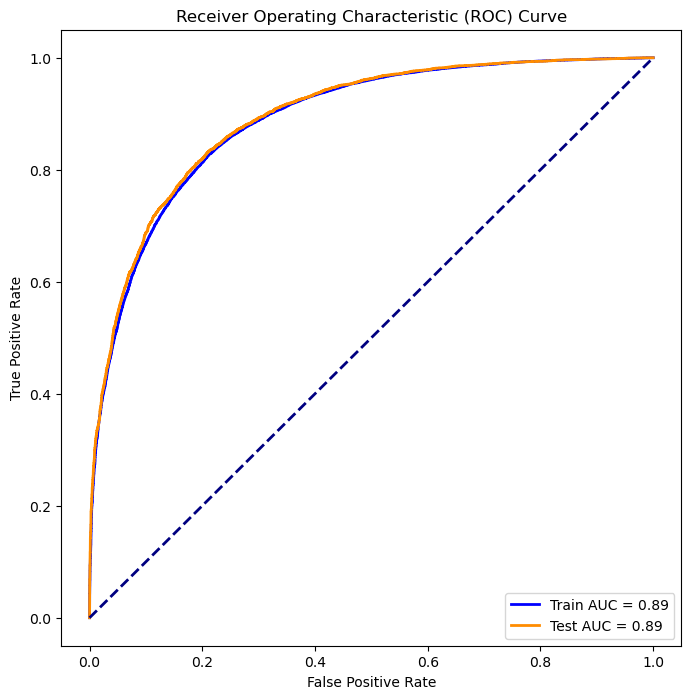

In [43]:
from sklearn.metrics import roc_curve, auc

# Set the model to evaluation mode
model.eval()

# Make predictions on the training set
with torch.no_grad():
    train_outputs = model(X_train_tensor).squeeze().numpy()

# Calculate the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_tensor.numpy(), train_outputs)
roc_auc_train = auc(fpr_train, tpr_train)

# Make predictions on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze().numpy()

# Calculate the ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_tensor.numpy(), test_outputs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves for both training and test sets
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

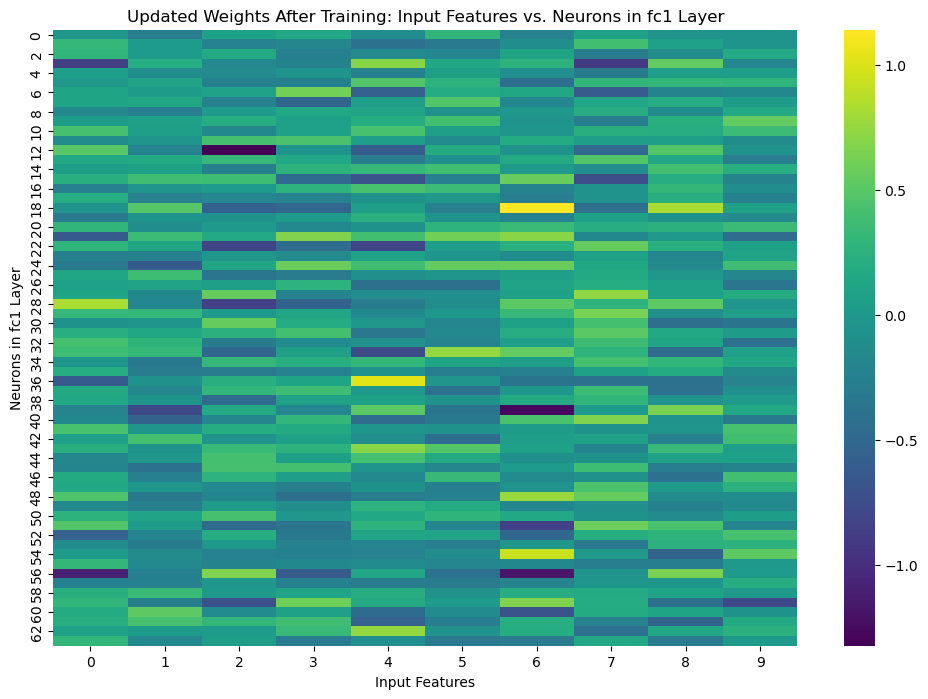

In [44]:
# Access the updated weights of the model after training
weights_after_training = model.fc1.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc1 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc1 Layer')
plt.show()

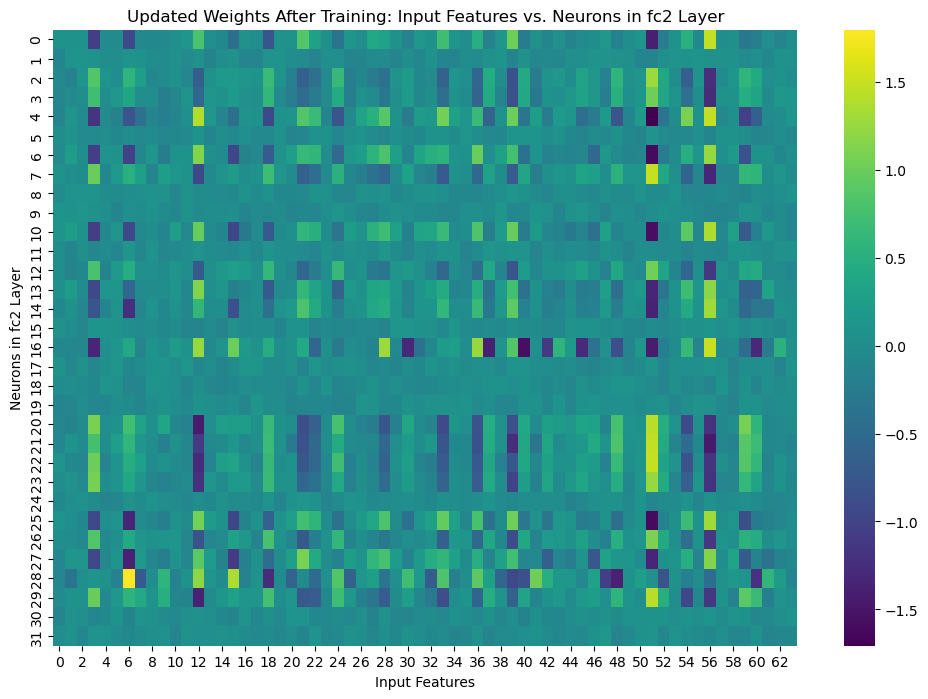

In [45]:
# Access the updated weights of the model after training
weights_after_training = model.fc2.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc2 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc2 Layer')
plt.show()

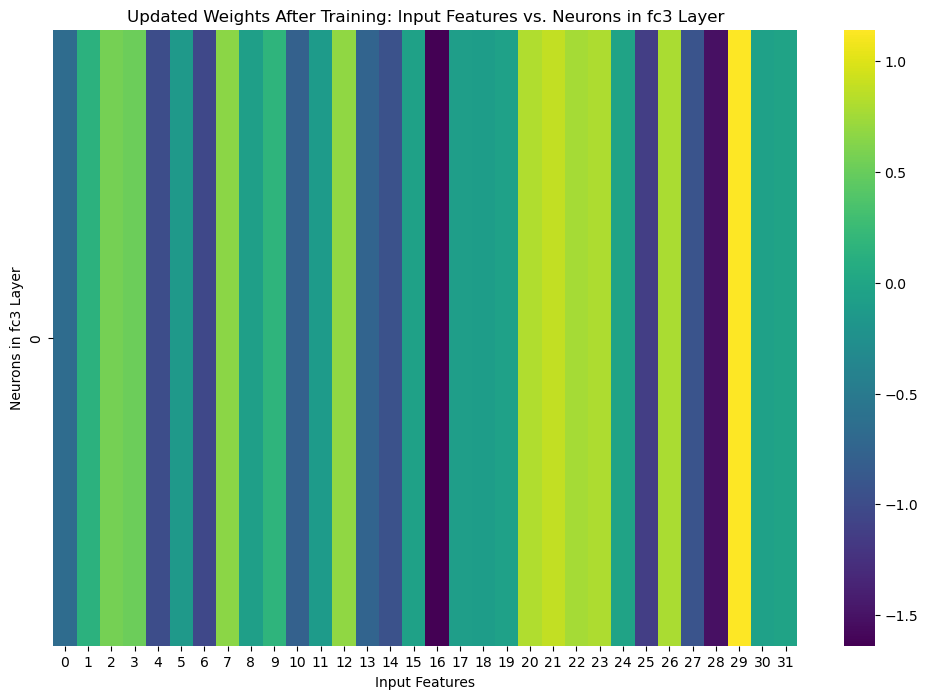

In [46]:
# Access the updated weights of the model after training
weights_after_training = model.fc3.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc3 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc3 Layer')
plt.show()

## Same again

In [13]:
X = df[['Frost', 'Winter Rain', 'Spring Rain', 'Spring Sun', 'Spring Psl', 'Winter Sun', 'Autumn Rain', 'Rain', 'Spring Wind', 'Tmax']].values
y = df['Class'].map(lambda x: 1 if x == 'post_1990' else 0).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [15]:
import torch
import torch.nn as nn
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        # Placeholder list to store intermediate features from all batches
        self.FEATS = []

        # Placeholder dictionary to store intermediate features from each batch
        self.features = {}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

Final Training Accuracy: 0.8103
Final Validation Accuracy: 0.8095


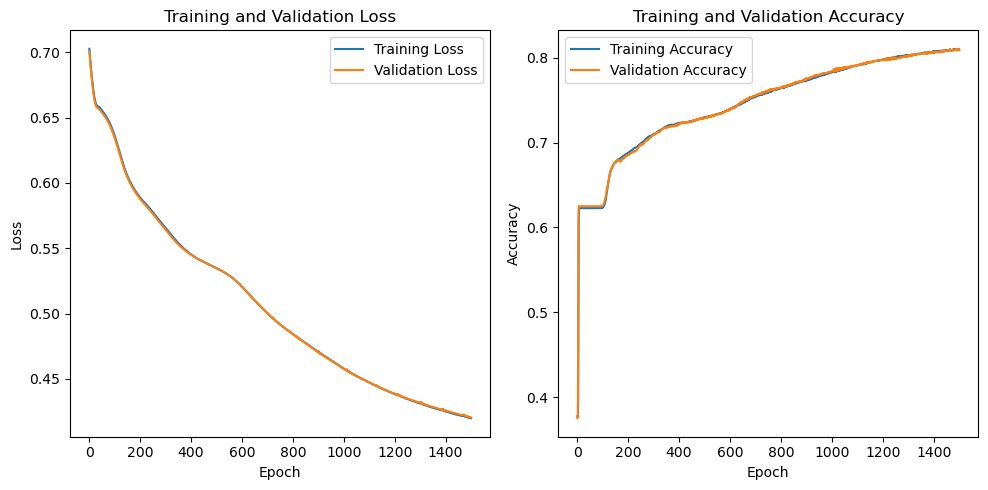

In [16]:
# Initialize the model
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
num_epochs = 1500

# Lists to store losses and accuracies
train_losses = []  
val_losses = []   
train_accuracies = []  
val_accuracies = []    

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
   
    # Training accuracy 
    with torch.no_grad():
        train_preds = (outputs >= 0.5).float()
        train_accuracy = train_preds.eq(y_train_tensor.float()).float().mean().item()
        train_accuracies.append(train_accuracy)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze() # validating the model
        val_loss = criterion(val_outputs, y_val_tensor.float())
        val_losses.append(val_loss.item())  # Append validation loss for each epoch

        # Validation accuracy
        val_preds = (val_outputs >= 0.5).float()
        val_accuracy = val_preds.eq(y_val_tensor.float()).float().mean().item()
        val_accuracies.append(val_accuracy)

    model.train()  # Set the model back to training mode
    
# Final training accuracy after all epochs
final_train_accuracy = train_accuracies[-1] 

# Print or use final_train_accuracy as needed
print(f'Final Training Accuracy: {final_train_accuracy:.4f}')

# Calculate final validation accuracy after all epochs
final_val_accuracy = val_accuracies[-1] 

# Print or use final_val_accuracy as needed
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_predictions = (model(X_test_tensor) >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor.view(-1, 1)).sum().item() / len(y_test_tensor)

print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8118


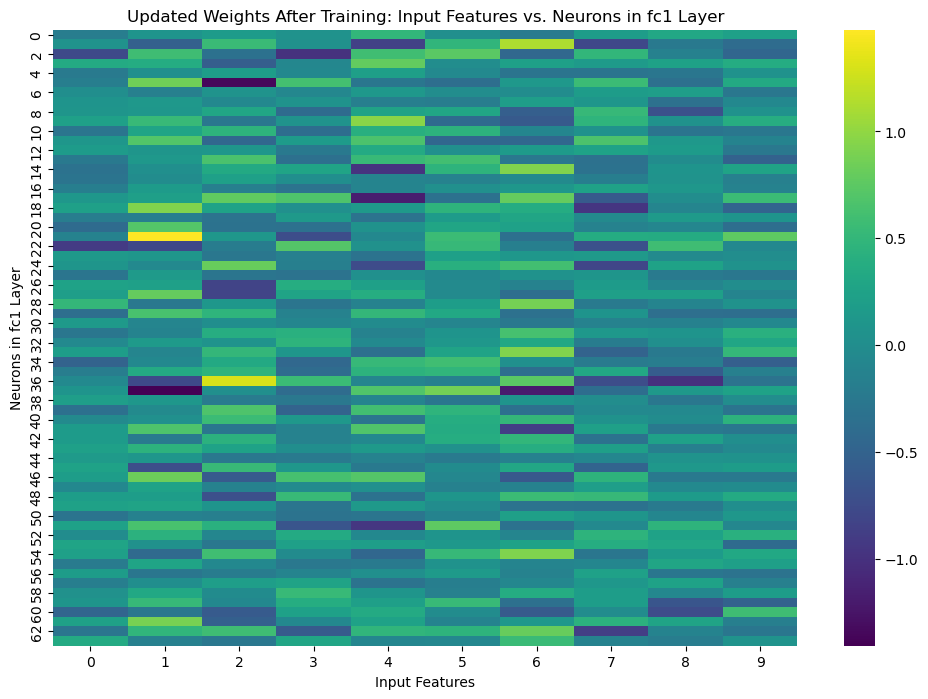

In [19]:
# Access the updated weights of the model after training
weights_after_training = model.fc1.weight.detach().numpy()

# Visualize the updated weights
plt.figure(figsize=(12, 8))
sns.heatmap(weights_after_training, cmap='viridis', fmt=".2f")
plt.title('Updated Weights After Training: Input Features vs. Neurons in fc1 Layer')
plt.xlabel('Input Features')
plt.ylabel('Neurons in fc1 Layer')
plt.show()